In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
customers=pd.read_csv("Customers.csv")
Products=pd.read_csv("Products.csv")
Transactions=pd.read_csv("Transactions.csv")

In [3]:
transaction_summary = Transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [4]:
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

In [5]:
customer_data.fillna(0, inplace=True)

In [6]:
features = customer_data[['Region', 'TotalValue', 'Quantity']]
features = pd.get_dummies(features, columns=['Region'], drop_first=True)

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
X = []
K = range(1, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    X.append(kmeans.inertia_)

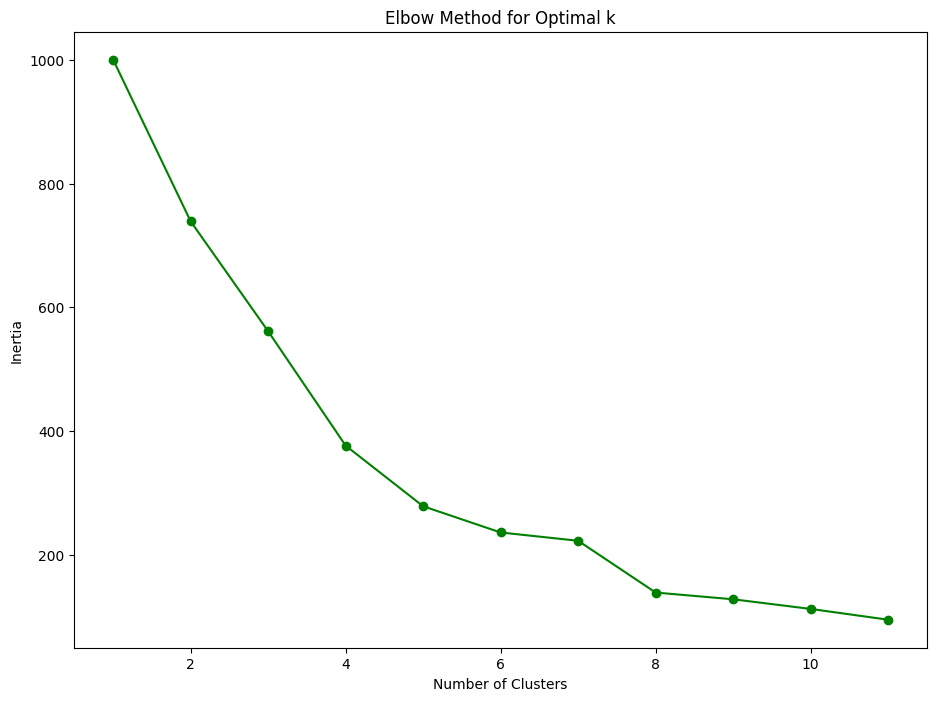

In [10]:
plt.figure(figsize=(11, 8))
plt.plot(K, X, 'bo-', color="green")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [13]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f'DB Index: {db_index}')

DB Index: 0.6328749072487388


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

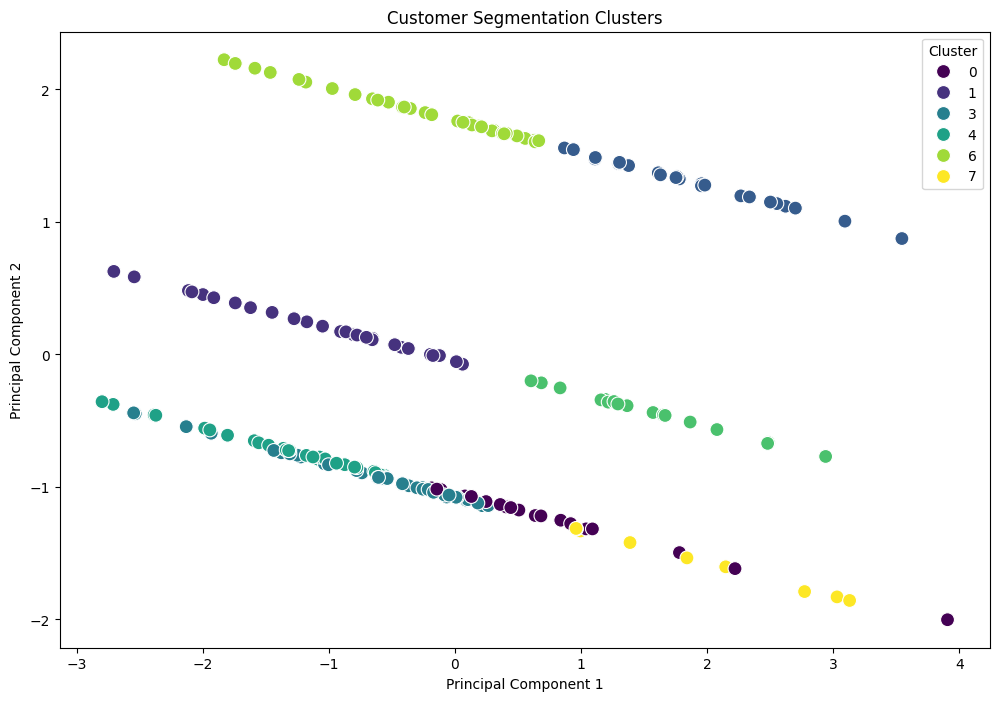

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()